In [26]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

# !pip install datetime
# !pip install yfinance


years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [27]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-10-19   83.172066  51.554928  104.230003   37.740253   42.347515
2009-10-20   82.732658  51.659122  103.419998   37.748981   42.088783
2009-10-21   81.990227  51.652634  103.750000   37.679115   41.677853
2009-10-22   82.823586  51.607002  103.919998   37.827610   42.126827
2009-10-23   81.876617  51.450699  103.489998   37.670372   41.586552
...                ...        ...         ...         ...         ...
2024-10-09  577.140015  73.839996  241.050003  493.149994  284.500000
2024-10-10  576.130005  73.809998  242.820007  492.589996  283.910004
2024-10-11  579.580017  73.820000  245.470001  493.359985  286.109985
2024-10-14  584.320007  73.769997  245.070007  497.500000  288.339996
2024-10-15  582.159729  74.019997  246.289993  491.861298  287.734985

[3773 rows x 5 columns]


In [28]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-10-20 -0.005297  0.002019 -0.007802  0.000231 -0.006128
2009-10-21 -0.009014 -0.000126  0.003186 -0.001853 -0.009811
2009-10-22  0.010113 -0.000884  0.001637  0.003933  0.010715
2009-10-23 -0.011499 -0.003033 -0.004146 -0.004165 -0.012908
2009-10-26 -0.010884 -0.001266 -0.015876 -0.003251 -0.011410
...              ...       ...       ...       ...       ...
2024-10-09  0.006903 -0.002705 -0.005461  0.007838  0.006949
2024-10-10 -0.001752 -0.000406  0.007316 -0.001136 -0.002076
2024-10-11  0.005970  0.000136  0.010854  0.001562  0.007719
2024-10-14  0.008145 -0.000678 -0.001631  0.008356  0.007764
2024-10-15 -0.003704  0.003383  0.004966 -0.011399 -0.002100

[3772 rows x 5 columns]


In [29]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [30]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2009-10-20   -0.003395
2009-10-21   -0.003524
2009-10-22    0.005103
2009-10-23   -0.007150
2009-10-26   -0.008537
                ...   
2024-10-09    0.002705
2024-10-10    0.000389
2024-10-11    0.005248
2024-10-14    0.004391
2024-10-15   -0.001771
Length: 3772, dtype: float64


In [54]:
days = 5

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-10-26   -0.017504
2009-10-27   -0.018462
2009-10-28   -0.030107
2009-10-29   -0.019662
2009-10-30   -0.028796
                ...   
2024-10-09    0.003390
2024-10-10    0.005744
2024-10-11    0.006608
2024-10-14    0.018076
2024-10-15    0.010963
Length: 3768, dtype: float64


In [55]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

43654.39391976146


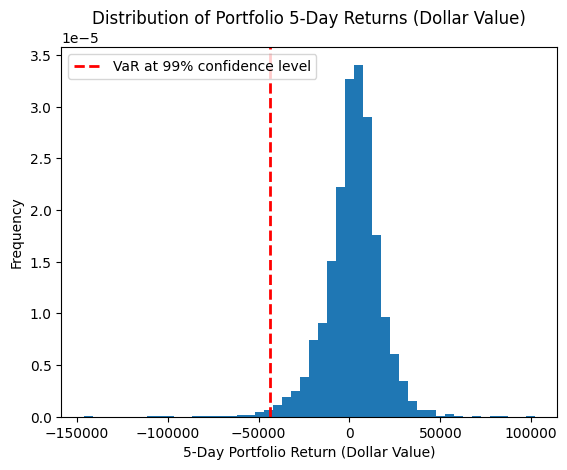

In [56]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [75]:
list_days = []
list_VaR  = []

for day in range(100):
    
    days = day
    
    range_returns = historical_returns.rolling(window = days).sum()
    range_returns = range_returns.dropna()
    # print(range_returns)
    
    confidence_interval = 0.99

    VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
    # print(VaR)
    list_days.append(days)
    list_VaR.append(VaR)

df = pd.DataFrame()
df["days"] =  list_days
df["VaR"] =  list_VaR

df

,days,VaR
0,0,-0.000000
1,1,20188.348166
2,2,28426.359246
3,3,34617.328621
4,4,40411.855907
...,...,...
95,95,116353.428915
96,96,117384.519110
97,97,117177.389442
98,98,118083.017527


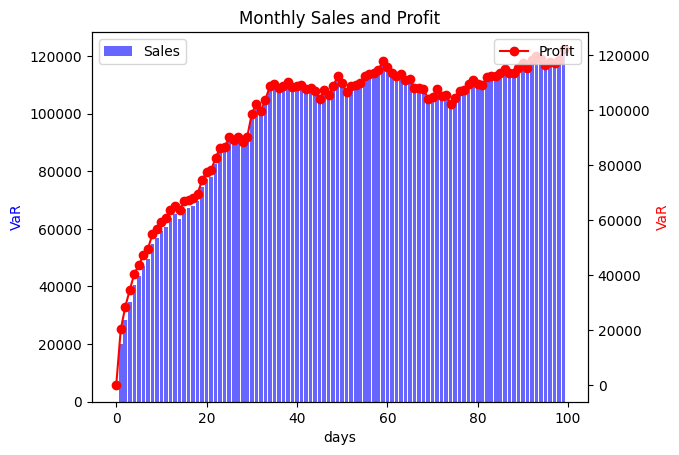

In [76]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting
fig, ax1 = plt.subplots()

# Create a bar plot for 'Sales'
ax1.bar(df['days'], df['VaR'], color='b', alpha=0.6, label='Sales')
ax1.set_xlabel('days')
ax1.set_ylabel('VaR', color='b')

# Create a second y-axis for 'Profit'
ax2 = ax1.twinx()
ax2.plot(df['days'], df['VaR'], color='r', marker='o', label='Profit')
ax2.set_ylabel('VaR', color='r')

# Add legends and show plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Monthly Sales and Profit')
plt.show()
